In [ ]:
!pip install xarray s3fs cartopy netCDF4 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 84.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2025.9.0 which is incompatible.
datasets 4.0.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.9.0 which is incompatible.


Enter year (e.g., 2025): 2025
Enter month (01–12): 01
Enter latitude (e.g., 32.7): 32.7
Enter longitude (e.g., -117.2): -100
Found 31 files for 2025-01


/tmp/ipython-input-3659551955.py:17: FutureWarning: In a future version of xarray the default value for data_vars will change from data_vars='all' to data_vars=None. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set data_vars explicitly.
  ds = xr.open_mfdataset(


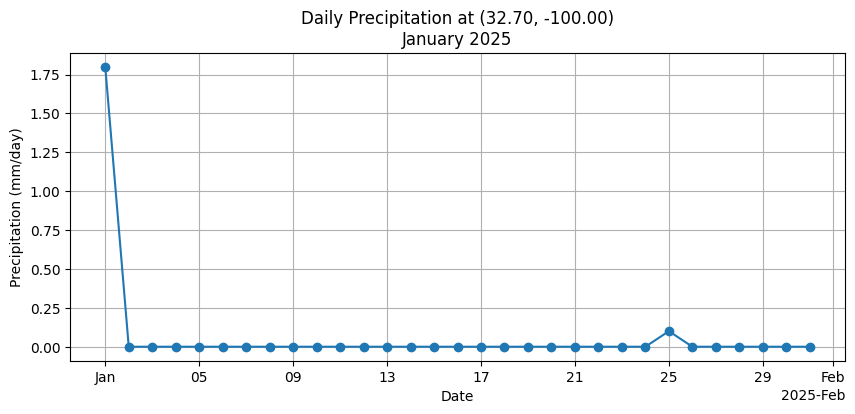

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


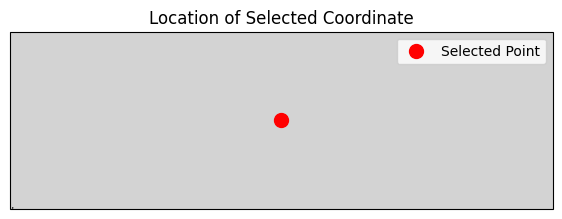

In [ ]:
import xarray as xr
import s3fs
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime
year = input("Enter year (e.g., 2025): ").strip()
month = input("Enter month (01–12): ").zfill(2)
lat_input = float(input("Enter latitude (e.g., 32.7): "))
lon_input = float(input("Enter longitude (e.g., -117.2): "))
fs = s3fs.S3FileSystem(anon=True)
file_urls = fs.glob(f"noaa-cdr-precip-cmorph-pds/data/daily/0.25deg/{year}/{month}/*.nc")
if not file_urls:
    raise FileNotFoundError(f"No files found for {year}-{month}")
print(f"Found {len(file_urls)} files for {year}-{month}")
s3_urls = [f"s3://{f}" for f in file_urls]
ds = xr.open_mfdataset(
    [fs.open(f, mode='rb') for f in file_urls],
    engine="h5netcdf",
    combine="by_coords",
    parallel=True,
    chunks={"time": 1}
)
var = "cmorph"
point_data = ds[var].sel(lat=lat_input, lon=lon_input, method="nearest")
ts = point_data.load()
plt.figure(figsize=(10, 4))
ts.plot(marker='o', linewidth=1.5)
plt.title(f"Daily Precipitation at ({lat_input:.2f}, {lon_input:.2f})\n{datetime.strptime(month,'%m').strftime('%B')} {year}")
plt.ylabel("Precipitation (mm/day)")
plt.xlabel("Date")
plt.grid(True)
plt.show()
fig = plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='aliceblue')
ax.scatter(lon_input, lat_input, color='red', s=100, transform=ccrs.PlateCarree(), label='Selected Point')
ax.legend()
ax.set_title("Location of Selected Coordinate", fontsize=12)
plt.show()

Enter comparison year (e.g., 2024): 2024
Enter comparison month (01–12): 01
Found 31 files for 2024-01


/tmp/ipython-input-2027349644.py:7: FutureWarning: In a future version of xarray the default value for data_vars will change from data_vars='all' to data_vars=None. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set data_vars explicitly.
  ds2 = xr.open_mfdataset(


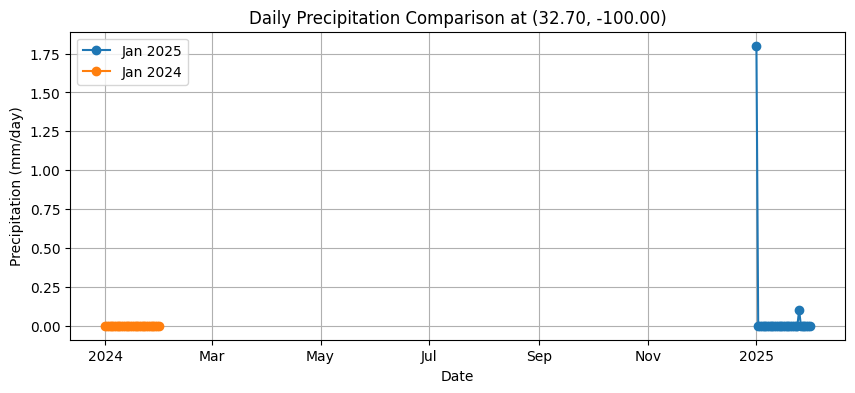

In [ ]:
year2 = input("Enter comparison year (e.g., 2024): ").strip()
month2 = input("Enter comparison month (01–12): ").zfill(2)
file_urls2 = fs.glob(f"noaa-cdr-precip-cmorph-pds/data/daily/0.25deg/{year2}/{month2}/*.nc")
if not file_urls2:
    raise FileNotFoundError(f"No  files found for {year2}-{month2}")
print(f"Found {len(file_urls2)} files for {year2}-{month2}")
ds2 = xr.open_mfdataset(
    [fs.open(f, mode='rb') for f in file_urls2],
    engine="h5netcdf",
    combine="by_coords",
    parallel=True,
    chunks={"time": 1}
)
var = "cmorph"
point_data2 = ds2[var].sel(lat=lat_input, lon=lon_input, method="nearest")
ts2 = point_data2.load()
plt.figure(figsize=(10, 4))
ts.plot(marker='o', linewidth=1.5, label=f"{datetime.strptime(month,'%m').strftime('%b')} {year}")
ts2.plot(marker='o', linewidth=1.5, label=f"{datetime.strptime(month2,'%m').strftime('%b')} {year2}")
plt.title(f"Daily Precipitation Comparison at ({lat_input:.2f}, {lon_input:.2f})")
plt.ylabel("Precipitation (mm/day)")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

def day_axis_series(xr_da):
    days = xr_da["time"].dt.day.values
    vals = xr_da.values
    out = np.full(31, np.nan, dtype=float)
    for d, v in zip(days, vals):
        if 1 <= int(d) <= 31:
            out[int(d) - 1] = float(v)
    return out
y1 = day_axis_series(ts)
y2 = day_axis_series(ts2)
label1 = f"{datetime.strptime(month, '%m').strftime('%b')} {year}"
label2 = f"{datetime.strptime(month2, '%m').strftime('%b')} {year2}"
x = np.arange(1, 32)
plt.figure(figsize=(12, 4))
plt.plot(x, y1, marker='o', linewidth=1.5, label=label1)
plt.plot(x, y2, marker='o', linewidth=1.5, label=label2)
plt.title(f"Daily Precipitation Comparison at ({lat_input:.2f}, {lon_input:.2f})")
plt.xlabel("Day of Month")
plt.ylabel("Precipitation (mm/day)")
plt.xticks(x)
plt.xlim(1, 31)
plt.grid(True, alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


NameError: name 'ts' is not defined